In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams
# rcParams['figure.figsize'] = 12,9
pd.set_option('display.max_columns', 20)

- Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [2]:
names_by_year = {}
for year in range(1880, 2018):
    names_by_year[year] = pd.read_csv(f'names/yob{year}.txt', names=['Names','Gender','Count'])

date_start = 1900
date_end = 2000

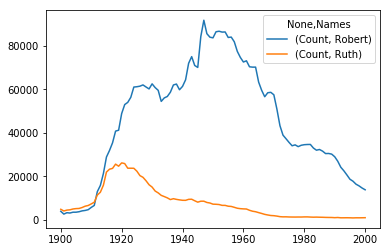

In [3]:
names_all_line = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all_line = names_all_line.loc[(names_all_line.index >= date_start) & (names_all_line.index <= date_end)]
names_all_line = names_all_line[(names_all_line['Names'] == 'Ruth') | (names_all_line['Names'] == 'Robert')]
names_all_line = names_all_line.groupby([names_all_line.index, names_all_line['Names']]).sum()
names_all_line = names_all_line.unstack('Names')
names_all_line.plot()

- Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

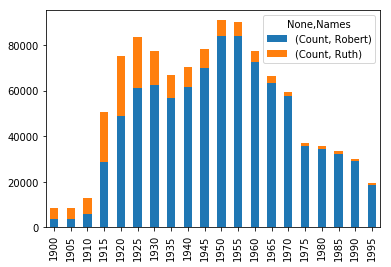

In [4]:
import numpy as np

date_start = 1900
date_end = 2000

years_5 = np.arange(date_start, date_end, 5)

names_all_bar = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all_bar = names_all_bar.loc[(names_all_bar.index.get_level_values(0).isin(years_5))]
names_all_bar = names_all_bar[(names_all_bar['Names'] == 'Ruth') | (names_all_bar['Names'] == 'Robert')]
names_all_bar = names_all_bar.groupby([names_all_bar.index, names_all_bar['Names']]).sum().unstack()
names_all_bar.plot(kind='bar', stacked=True)

Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

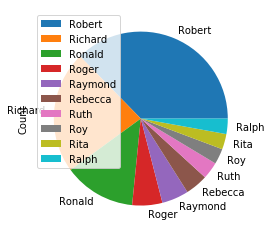

In [5]:
names_all_pie = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all_pie = names_all_pie.loc[(names_all_pie.index.get_level_values(0).isin([1950]))]
names_all_pie = names_all_pie[names_all_pie['Names'].str.contains('R')]
names_all_pie = names_all_pie.groupby(['Names']).sum().sort_values(by='Count', ascending=False).head(10)
names_all_pie
names_all_pie.plot(kind='pie', y='Count')

Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


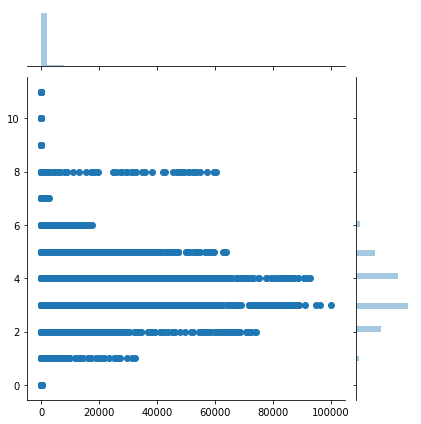

In [67]:
import seaborn as sns

names_all_point = pd.concat(names_by_year).reset_index(level=1, drop=True)
names_all_point = names_all_point.loc[(names_all_point.index >= date_start) & (names_all_point.index <= date_end)]
names_all_point['Name_len'] = names_all_point.apply(lambda x: len([c for c in x['Names'] if c.lower() in 'bcdfghjklmnpqrstvwxz']), axis=1)
names_all_point = names_all_point.groupby([names_all_point.index, 'Names']).agg({"Count" :[np.sum], "Name_len":[np.mean]}, axis = 1)
names_all_point

sns.jointplot(x='Count', y='Name_len', data=names_all_point, kind='scatter')
